**EDA Analysis**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to visualize matplotlib wale graphs nicely
import seaborn as sns
#nlp libraries
#stop words are general english words
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#countervectorizer --> transforms strings to numerical vectors
from sklearn.feature_extraction.text import CountVectorizer
#estimating model performance using cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#tuning hyper parameters
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#serializing python objects
import pickle
#regular expression for text manipulation
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#load the data

data = pd.read_csv(r"amazon_alexa.tsv", delimiter='\t', quoting=3)
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [4]:
data.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
#Coloumns name
print(f"Feature name: {data.columns.values}")

Feature name: ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [6]:
#Check for null values
data.isnull().sum()
#if there existed a null value I can find it by data[data['feature with null value].isna()==True]
#you can drop the column --> data.dromna(inplace=True)

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [7]:
#To know the length of the verified_reviews, created a length column
data['length'] = data['verified_reviews'].apply(len)

In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [9]:
#iloc allows user to choose specific row and column
#integer location
data.dtypes
#rating feedback length are integer values and object means string values



rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

**Analyzing rating column**



In [10]:
len(data)

3150

In [11]:
#distinct values in ratings
print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


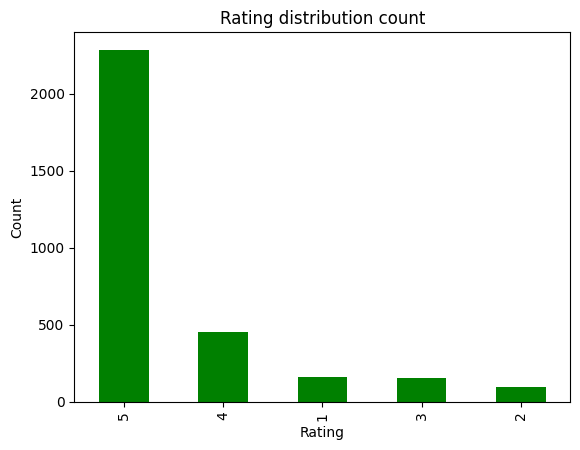

In [12]:
#graph plotting
#value_counts is the number of values that the feature rating has
data['rating'].value_counts().plot.bar(color='green')
plt.title('Rating distribution count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [13]:
#finding the %distribution of each rating
#round till 2 decimals
print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64


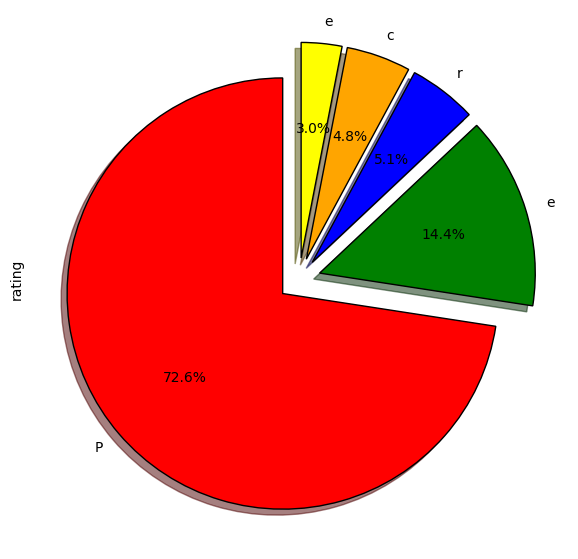

In [14]:
#making piechart
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green','blue', 'orange', 'yellow')
wp ={'linewidth': 1, "edgecolor": 'black'}
tags=data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow =True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, labels='Percentage')

from io import BytesIO
graph=BytesIO()
fig.savefig(graph, format="png")

**Analyzing Feedback Column**

In [15]:
print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
1    2893
0     257
Name: feedback, dtype: int64


In [16]:
#values with feedback==0 --> means negative feedback
review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

#values with feedback==1  --> means positive feedback
review_1=data[data['feedback']==1].iloc[1]['verified_reviews']
print(review_1)

Sound is terrible if u want good music too get a bose
Loved it!


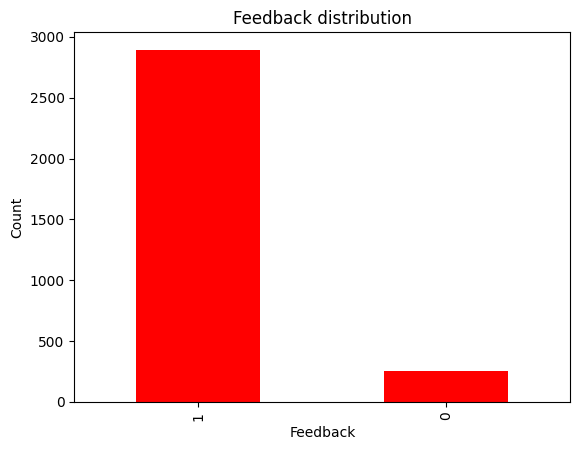

In [17]:
#graph for the feedback
data['feedback'].value_counts().plot.bar(color='red')
plt.title('Feedback distribution')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [18]:
#percentage
print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
1    91.84
0     8.16
Name: feedback, dtype: float64


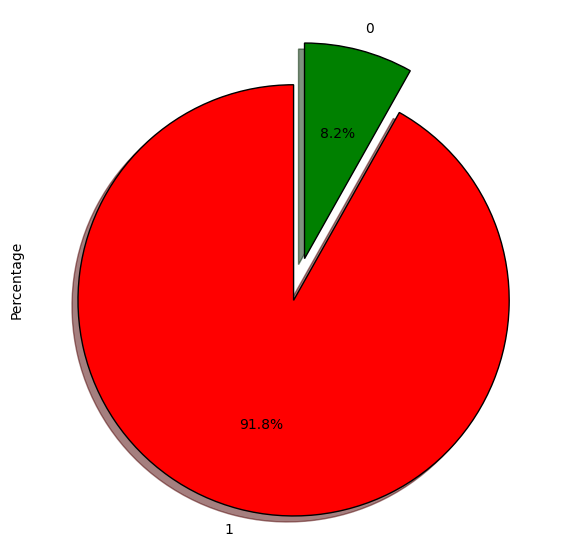

In [19]:
#pie chart
fig = plt.figure(figsize=(7,7))
colors = {'red', 'green'}
wp={'linewidth':1, "edgecolor":'black'}
tags=data['feedback'].value_counts()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage')
plt.show()

In [20]:
#feedback == 0 and == 1
feedback_0 = data[data['feedback']==0]['rating'].value_counts()
print(feedback_0)
feedback_1 = data[data['feedback']==1]['rating'].value_counts()
print(feedback_1)
#feedback == 0 has 1 and 2 ratings and 1 has 3,4 and 5 ratings

1    161
2     96
Name: rating, dtype: int64
5    2286
4     455
3     152
Name: rating, dtype: int64


**Analyzing variation column**

In [21]:
#variations of amazon alexa
print(f"Variation value count \n{data['variation'].value_counts()}")

Variation value count 
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


In [22]:
#variation vs ratings
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

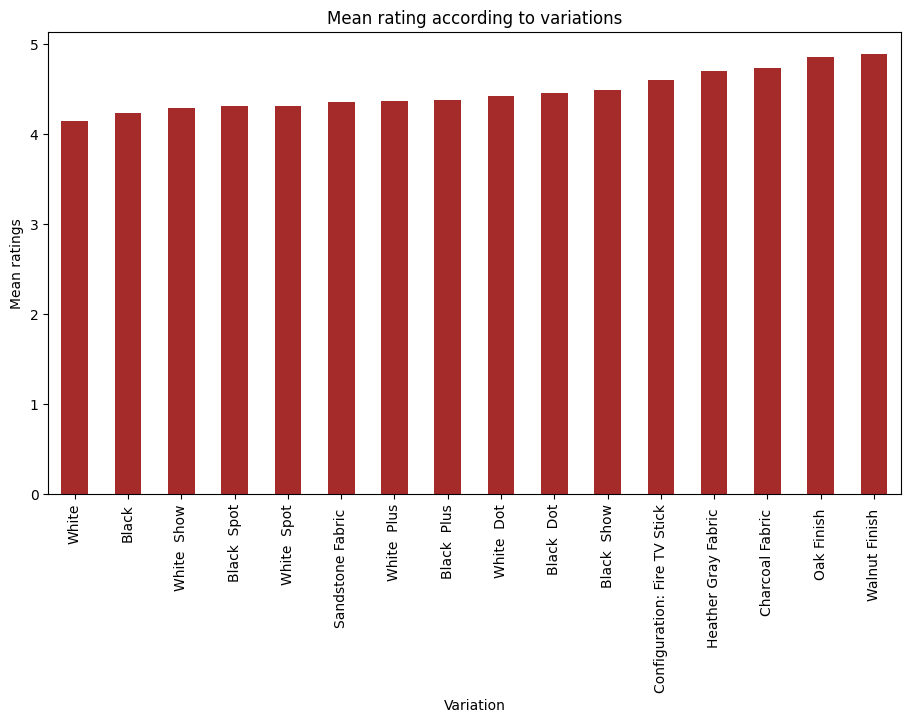

In [23]:
#analyzing above rating
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='brown', figsize=(11,6))
plt.title('Mean rating according to variations')
plt.xlabel('Variation')
plt.ylabel('Mean ratings')
plt.show()

**Analyzing verified reviews**

In [24]:
#saari information mean median mode type aajayega
data['length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review')]

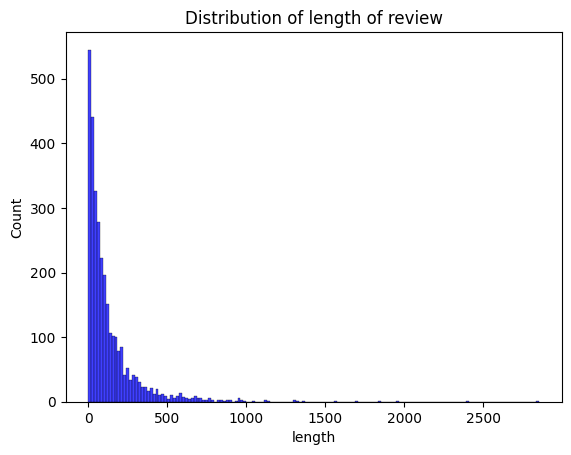

In [25]:
sns.histplot(data['length'], color='blue').set(title='Distribution of length of review')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

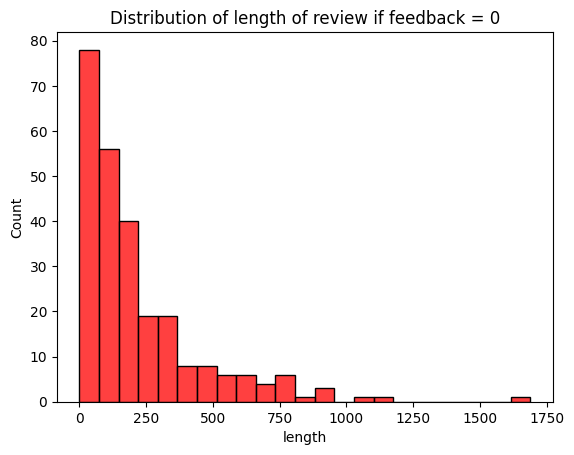

In [26]:
#length of feedabck == 0
sns.histplot(data[data['feedback']==0]['length'], color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution with feedback == 1')]

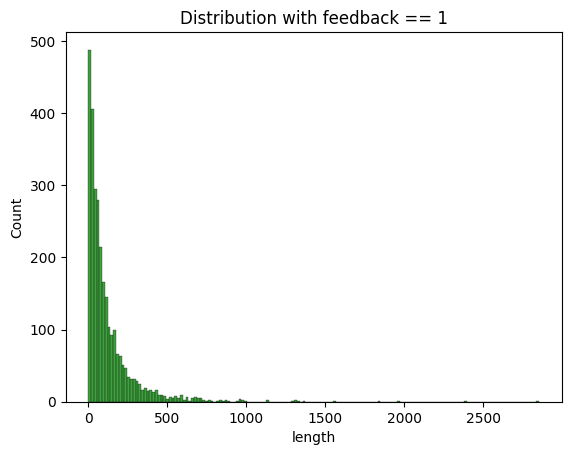

In [27]:
sns.histplot(data[data['feedback']==1]['length'], color='green').set(title='Distribution with feedback == 1')

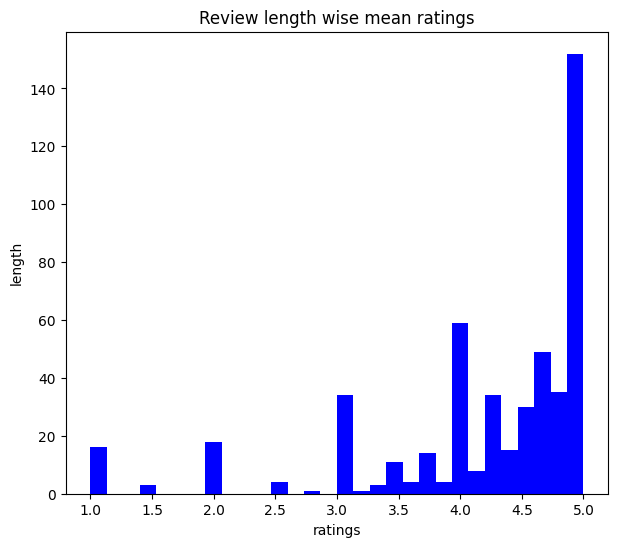

In [28]:
#lengthwise mean ratings
#length ka mean with respect to ratings
data.groupby('length')['rating'].mean().plot.hist(color='blue', figsize=(7,6), bins= 30)
plt.title('Review length wise mean ratings')
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()
#mean length is high for a positive feedback

In [29]:
#we take textual data and convert to vectors
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

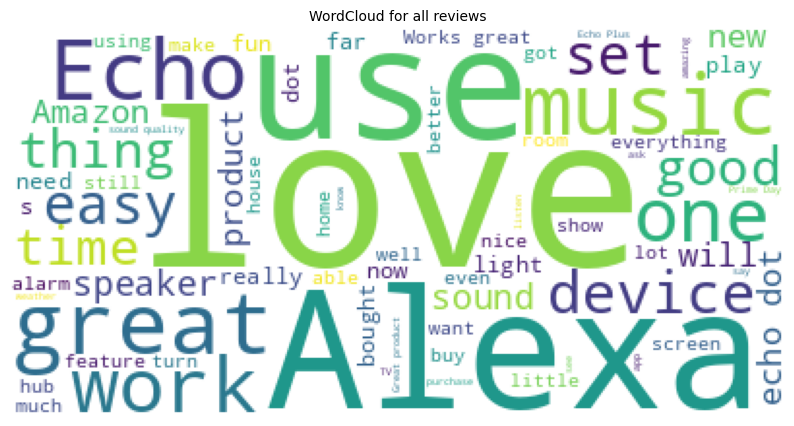

In [30]:
#combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])

#initialize wordcloud object
wc = WordCloud(background_color='white', max_words=70)

#generate and plot word cloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('WordCloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [31]:
#finding unique words in each feedback category

#combing according to feedabck category
neg_reviews = " ".join([review for review in data[data['feedback']==0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback']==1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()


#finding words in reviews that are present in that category
unique_neg = [x for x in neg_reviews if x not in pos_reviews]
unique_neg = " ".join(unique_neg)

unique_pos = [x for x in pos_reviews if x not in neg_reviews]
unique_pos = " ".join(unique_pos)

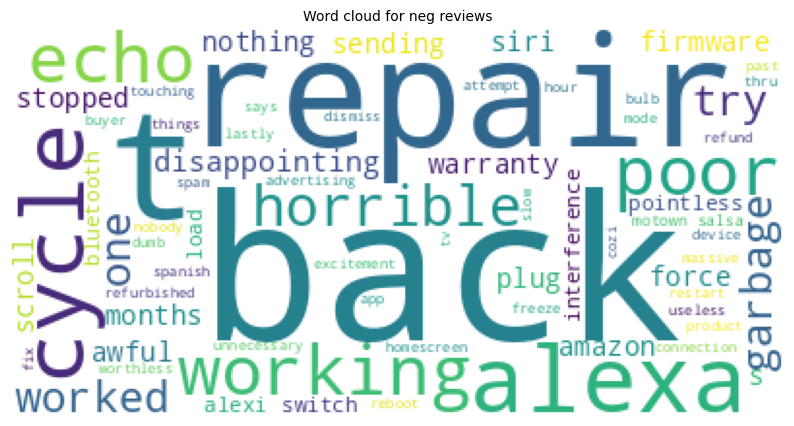

In [32]:
wc = WordCloud(background_color='white', max_words=70)

#generate the plot
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_neg))
plt.title('Word cloud for neg reviews', fontsize=10)
plt.axis('off')
plt.show()

**PreProcessing and building models**

Replace any non alphabet characters with a space
convertb to lower case and split into words
iterate on words and if not stopword then add stemmed form

In [33]:
#identifying x and y variables and then making model
#porter stemmer texh to remove suffix from english words and obtain their stems --> running, ran runs to run (base form)
corpus = [] #large and structured collection of data --> list
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):

  #remove all the patterns excluding having lower and uppercase alphabets and convert them to ' ' that is spaces
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [37]:
#convert textual to numerical by count vectorizer
#2500 --> most frequent phle 2500 words s jyada nhi
cv = CountVectorizer(max_features = 2500)


#storing independent and dependent variables in X and y
#changing corpus wala words wali list to numerical by fir
X = cv.fit_transform(corpus).toarray()


#sets y --> target variable as feedback
y = data['feedback'].values

In [43]:
#Saving the Count Vectorizer
pickle.dump(cv, open('countVectorizer(1).pkl', 'wb'))

In [44]:
print(f"XShape: {X.shape}")
print(f"yShape: {y.shape}")

XShape: (3150, 2500)
yShape: (3150,)


In [46]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=15)
print(f"XTrain: {X_train.shape}")

XTrain: (2205, 2500)


In [48]:
#Min max scaling
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.fit_transform(X_test)

In [49]:
#saving
pickle.dump(scaler, open('scaler.pkl', 'wb'))

**Random Forest**

In [50]:
#fitting scaler X_train and y_train in Random forest
model_rf=RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [51]:
#accuracy of model
print(f"Training accuracy: ", model_rf.score(X_train_scl, y_train))
print(f"Testing accuracy: ",model_rf.score(X_test_scl, y_test))

Training accuracy:  0.9941043083900227
Testing accuracy:  0.9386243386243386


In [53]:
#predicting on the test set
y_preds=model_rf.predict(X_test_scl)

In [58]:
#confusion matrix
cm = confusion_matrix(y_test, y_preds)

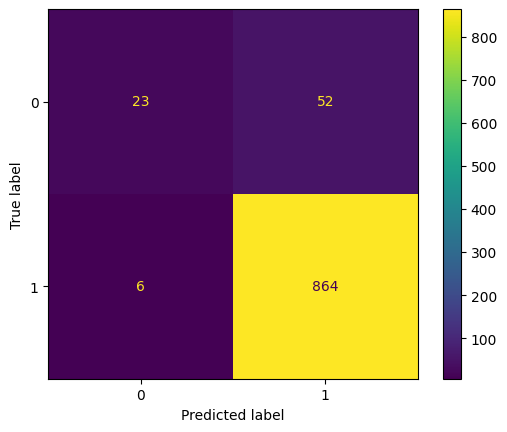

In [60]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

**K fold cross validation**

In [61]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)
print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9346955985191279
Standard Variance : 0.012170455514244139


In [63]:
 #applying grid search to get the optimal parameters in random forests
params = {
     'bootstrap': [True],
     'max_depth': [80,100],
     'min_samples_split': [8,12],
     'n_estimators': [100, 300]
 }

In [66]:
cv_object = StratifiedKFold(n_splits = 2)
grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose=0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [68]:
#getting best parameters
print("Best Parameters Combinations: {}".format(grid_search.best_params_))

Best Parameters Combinations: {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [69]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))


Cross validation mean accuracy on train set : 97.00135170044409
Cross validation mean accuracy on test set : 92.30147773848915
Accuracy score for test set : 0.9386243386243386


**XGBoost**

In [70]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
print(f"Training Accuracy:", model_xgb.score(X_train_scl, y_train))
print(f"Testing Accruarcy:", model_xgb.score(X_test_scl, y_test))

Training Accuracy: 0.9700680272108844
Testing Accruarcy: 0.9343915343915344


In [73]:
y_preds = model_xgb.predict(X_test)

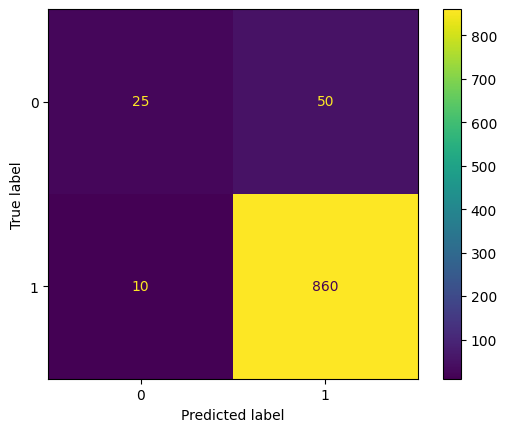

In [75]:
cm = confusion_matrix(y_test, y_preds)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

**Decision Tree Classifier**

In [77]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [79]:
#accuracy
print(f"Accuracy on training:", model_dt.score(X_train_scl, y_train))
print(f"Accuracy on testing:", model_dt.score(X_test_scl, y_test))

Accuracy on training: 0.9941043083900227
Accuracy on testing: 0.9142857142857143


In [80]:
y_preds=model_dt.predict(X_test)


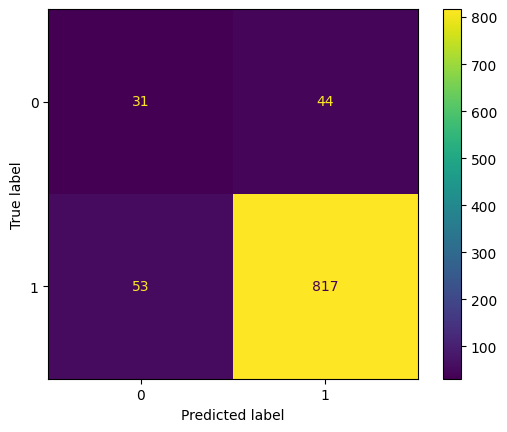

In [82]:
cm = confusion_matrix(y_test, y_preds)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
cm_display.plot()
plt.show()